 ## Analyse des données du dataset

Dans ce document il est question d'effectuer une analyse sur les données météo récoltées pour une ville donnée. Un premier traitement de nettoyage a été effectué sur ces données. Ici il est qustion d'approfondir cette analyse afin de pouvoir tirer des conclusions.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

On charge le dataset

In [2]:
data = pd.read_csv('data_clean.csv',parse_dates=['Time'])

### 1. Nettoyage

Prenons un petit aperçu des données

In [3]:
data.head()

,Unnamed: 0,SensorId,Time,pm1,pm25,pm10,temperature,humidity,latitude,longitude
0,0,3,2017-02-21 04:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
1,1,3,2017-02-22 10:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
2,2,3,2017-02-22 11:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
3,3,3,2017-02-22 15:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
4,4,3,2017-02-22 18:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375


Les statistiques descriptives de ce jeu de donnée sont :

In [4]:
data.describe()

,Unnamed: 0,SensorId,pm1,pm25,pm10,temperature,humidity,latitude,longitude
count,725116.000000,725116.000000,725116.000000,725116.000000,725116.000000,725116.000000,725116.000000,725116.000000,725116.000000
mean,362557.500000,179.064017,5.041327,4.608449,4.971678,2.389495,8.330034,50.062198,19.948154
std,209323.103234,16.088963,11.304919,10.895836,12.708569,5.660562,24.939623,0.020524,0.054438
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.005587,19.867504
25%,181278.750000,173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.048924,19.899209
50%,362557.500000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.062418,19.947015
75%,543836.250000,189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.077467,19.983935
max,725115.000000,202.000000,97.000000,97.000000,97.000000,46.000000,97.000000,50.098304,20.101569


La colonne "Unnamed: 0" ici ne nous sert à rien. Il serait donc judicieux de la supprimer.

In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
data.head()

,SensorId,Time,pm1,pm25,pm10,temperature,humidity,latitude,longitude
0,3,2017-02-21 04:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
1,3,2017-02-22 10:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
2,3,2017-02-22 11:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
3,3,2017-02-22 15:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375
4,3,2017-02-22 18:00:00,11.0,0.0,0.0,0.0,0.0,50.057748,19.961375


### 2. Une journée

Observons les données d'une seule journée :

In [7]:
data[data['Time']=='2017-01-17 11:00:00'].sort_values(by = 'SensorId').head(15)

,SensorId,Time,pm1,pm25,pm10,temperature,humidity,latitude,longitude
419,3,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,0.0,50.057748,19.961375
1196,3,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,38.0,50.057748,19.961375
1515,3,2017-01-17 11:00:00,85.0,0.0,0.0,0.0,0.0,50.057748,19.961375
6233,142,2017-01-17 11:00:00,49.0,0.0,0.0,0.0,0.0,50.084816,19.878066
6484,142,2017-01-17 11:00:00,0.0,51.0,0.0,0.0,0.0,50.084816,19.878066
6568,142,2017-01-17 11:00:00,0.0,0.0,91.0,0.0,0.0,50.084816,19.878066
643545,169,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,0.0,50.048699,20.101569
659610,169,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,49.0,50.048699,20.101569
39934,170,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,20.0,50.077467,19.895577
55653,170,2017-01-17 11:00:00,39.0,0.0,0.0,0.0,0.0,50.077467,19.895577


On constate ici que dans note jeu de donnée, pour un enregistrement donnée et un capteur, on a plusieurs lignes. Il serait intéressant de regrouper tous les enregistrements par rapport au temps. 

In [8]:
data = data.groupby(['SensorId', 'Time'],as_index=False).sum()

In [9]:
data[data['Time']=='2017-01-17 11:00:00'].sort_values(by = 'SensorId').head(15)

,SensorId,Time,pm1,pm25,pm10,temperature,humidity,latitude,longitude
0,3,2017-01-17 11:00:00,85.0,0.0,0.0,0.0,38.0,150.173244,59.884125
7635,142,2017-01-17 11:00:00,49.0,51.0,91.0,0.0,0.0,150.254448,59.634198
16842,169,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,49.0,100.097398,40.203138
24968,170,2017-01-17 11:00:00,39.0,41.0,0.0,0.0,20.0,200.309868,79.582308
33238,171,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,28.0,50.084134,19.968416
41391,172,2017-01-17 11:00:00,40.0,42.0,0.0,0.0,0.0,100.146188,39.773500
49243,173,2017-01-17 11:00:00,46.0,49.0,88.0,0.0,37.0,200.230148,79.590188
57539,174,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,24.0,100.114484,39.829748
64755,176,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,51.0,100.088134,39.997608
73137,177,2017-01-17 11:00:00,0.0,0.0,0.0,0.0,0.0,50.093619,19.924138


On se rassure que chaque ligne a au moins une donnée de méteo. On évite ainsi d'avoir des données inutiles.

In [10]:
data = data.replace(0,np.nan)
data = data.dropna(subset=['pm1','pm25','pm10','temperature','humidity'])

In [11]:
data.describe()

,SensorId,pm1,pm25,pm10,temperature,humidity,latitude,longitude
count,49973.000000,49973.000000,49973.000000,49973.000000,49973.000000,49973.000000,49973.000000,49973.000000
mean,179.958418,16.780501,15.038301,25.412203,12.779721,75.520261,250.312040,99.728004
std,12.637046,8.111243,8.307822,13.850273,7.305553,23.140938,0.100510,0.267761
min,140.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.090030,99.337520
25%,173.000000,10.000000,8.000000,14.000000,7.000000,49.000000,250.274535,99.496045
50%,180.000000,17.000000,15.000000,24.000000,12.000000,89.000000,250.312090,99.678885
75%,189.000000,23.000000,21.000000,36.000000,17.000000,92.000000,250.387335,99.842080
max,201.000000,51.000000,51.000000,94.000000,45.000000,97.000000,250.491520,100.507845


### 3. Un capteur

Regardons de près les données d'un seul capteur

In [12]:
data.groupby(['SensorId'], as_index=False).count().max()

SensorId        201
Time           3122
pm1            3122
pm25           3122
pm10           3122
temperature    3122
humidity       3122
latitude       3122
longitude      3122
dtype: int64

Nous allon donc regarder le capteur 201 car il est celui qui renferme le plus de contenu.

In [13]:
captor_201 = data[data['SensorId']==201]

In [14]:
captor_201 = captor_201.drop(columns=['latitude','longitude','SensorId'])
captor_201.head()

,Time,pm1,pm25,pm10,temperature,humidity
180731,2017-01-03 10:00:00,28.0,24.0,43.0,5.0,49.0
180949,2017-01-12 12:00:00,27.0,23.0,42.0,6.0,51.0
180950,2017-01-12 13:00:00,24.0,19.0,34.0,5.0,51.0
180951,2017-01-12 14:00:00,26.0,21.0,38.0,6.0,50.0
180958,2017-01-12 21:00:00,29.0,26.0,47.0,7.0,46.0


In [15]:
captor_201.index = pd.to_datetime(captor_201.Time, format="%Y-%m-%d %H:%M:%S")

In [16]:
captor_201 = captor_201.drop(columns=['Time'])

In [17]:
captor_201.head()

,pm1,pm25,pm10,temperature,humidity
Time,,,,,
2017-01-03 10:00:00,28.0,24.0,43.0,5.0,49.0
2017-01-12 12:00:00,27.0,23.0,42.0,6.0,51.0
2017-01-12 13:00:00,24.0,19.0,34.0,5.0,51.0
2017-01-12 14:00:00,26.0,21.0,38.0,6.0,50.0
2017-01-12 21:00:00,29.0,26.0,47.0,7.0,46.0


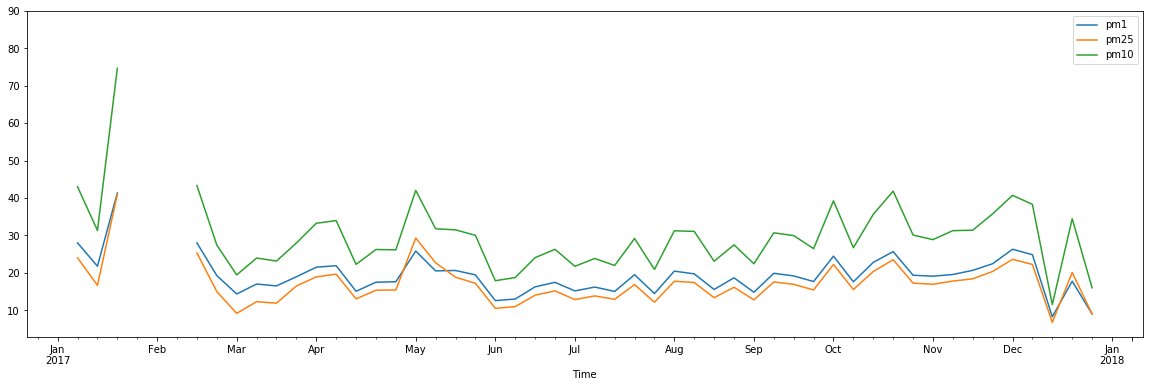

In [18]:
captor_201[['pm1','pm25','pm10']].resample('W').mean().plot(figsize=(20,6))
plt.show()

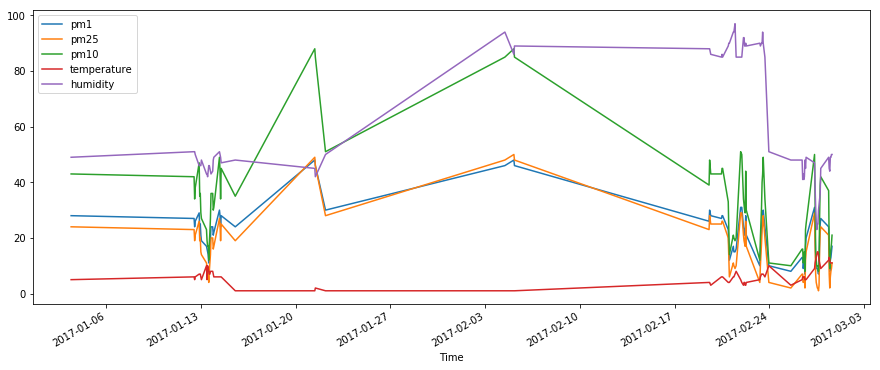

In [19]:
captor_201['2017-01':'2017-02'].plot(figsize=(15,6))

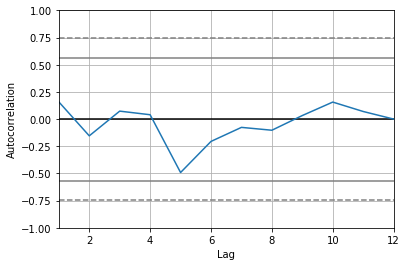

In [22]:
pd.plotting.autocorrelation_plot(captor_201['pm1'].resample("M").mean())

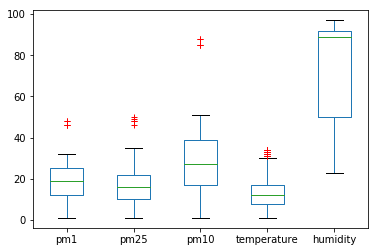

In [23]:
captor_201.plot.box(sym='r+')
plt.show()

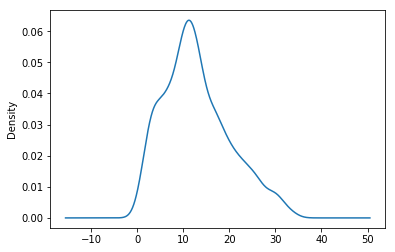

In [24]:
captor_201.temperature.plot.kde()

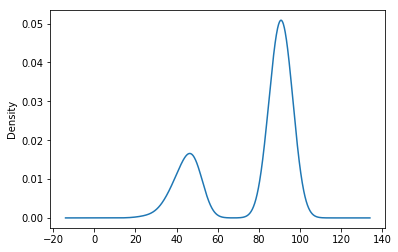

In [25]:
captor_201.humidity.plot.kde()

In [26]:
captor_201.corr()

,pm1,pm25,pm10,temperature,humidity
pm1,1.000000,0.974653,0.985978,-0.244123,0.397632
pm25,0.974653,1.000000,0.984396,-0.243732,0.425381
pm10,0.985978,0.984396,1.000000,-0.250134,0.410551
temperature,-0.244123,-0.243732,-0.250134,1.000000,-0.619929
humidity,0.397632,0.425381,0.410551,-0.619929,1.000000


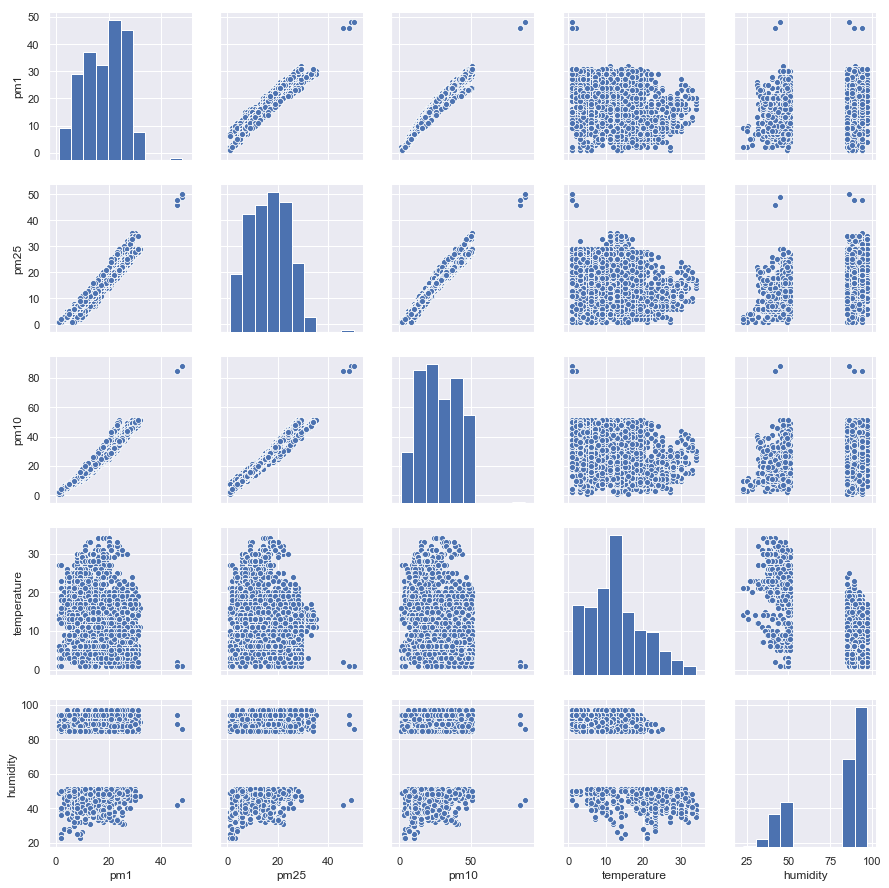

In [27]:
sns.set()
sns.pairplot(captor_201)

In [28]:
captor_201

,pm1,pm25,pm10,temperature,humidity
Time,,,,,
2017-01-03 10:00:00,28.0,24.0,43.0,5.0,49.0
2017-01-12 12:00:00,27.0,23.0,42.0,6.0,51.0
2017-01-12 13:00:00,24.0,19.0,34.0,5.0,51.0
2017-01-12 14:00:00,26.0,21.0,38.0,6.0,50.0
2017-01-12 21:00:00,29.0,26.0,47.0,7.0,46.0
2017-01-12 22:00:00,23.0,19.0,35.0,7.0,46.0
2017-01-12 23:00:00,25.0,20.0,36.0,7.0,46.0
2017-01-13 00:00:00,21.0,15.0,29.0,6.0,46.0
2017-01-13 01:00:00,19.0,14.0,27.0,5.0,48.0


### 4. Tous les capteurs

In [29]:
all_cap = data.copy()

In [30]:
all_cap.index = pd.to_datetime(all_cap.Time, format="%Y-%m-%d %H:%M:%S")

In [31]:
all_cap = all_cap.drop(columns = ['Time'])

Nous allons prendre les données de la journée du 11 decembre 2017.

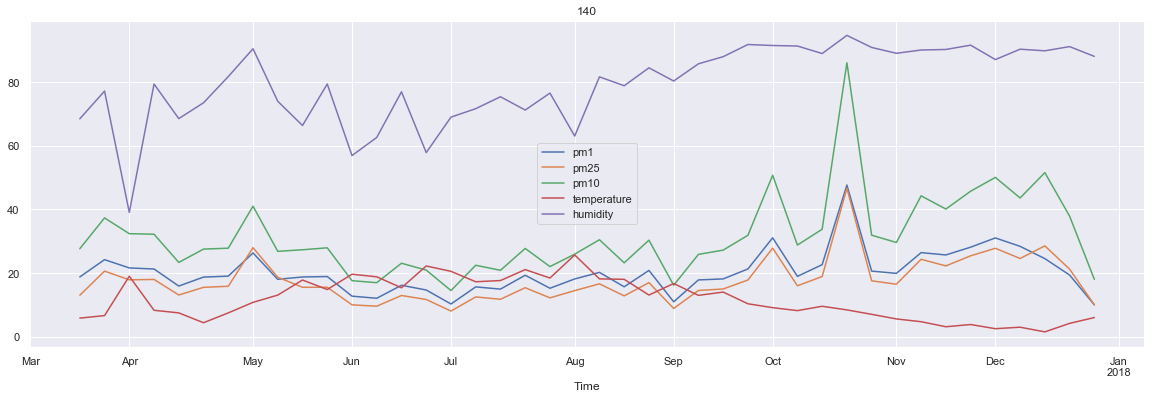

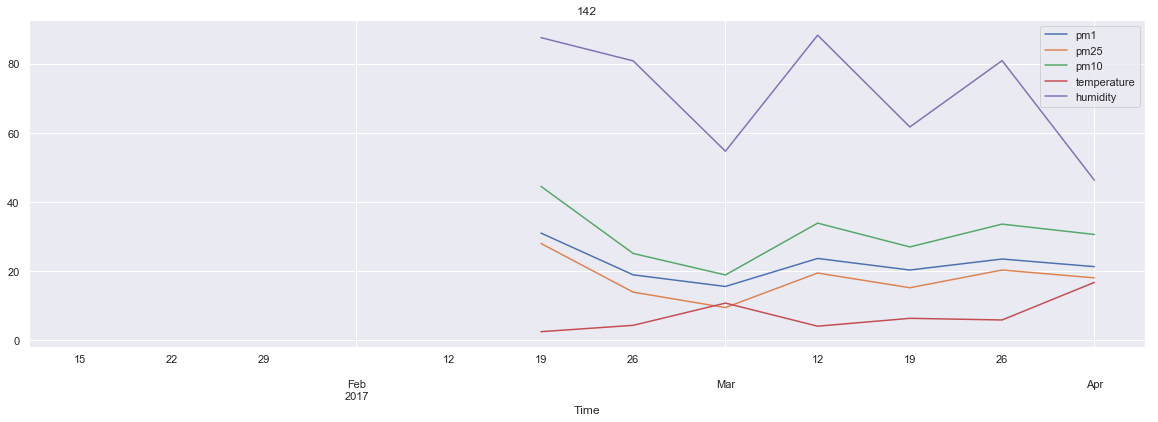

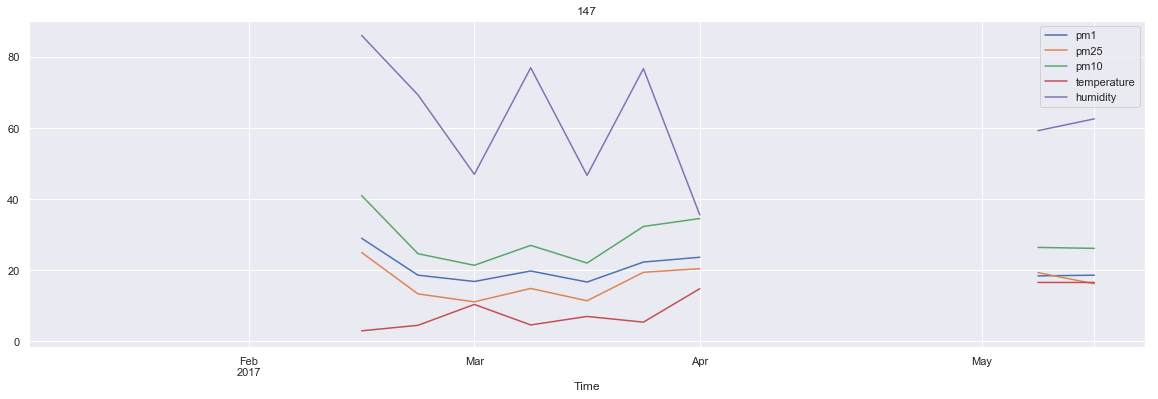

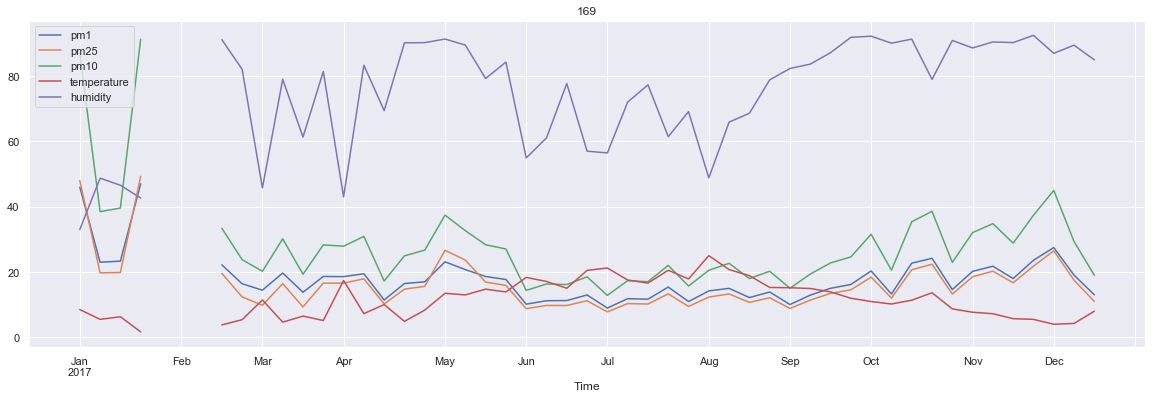

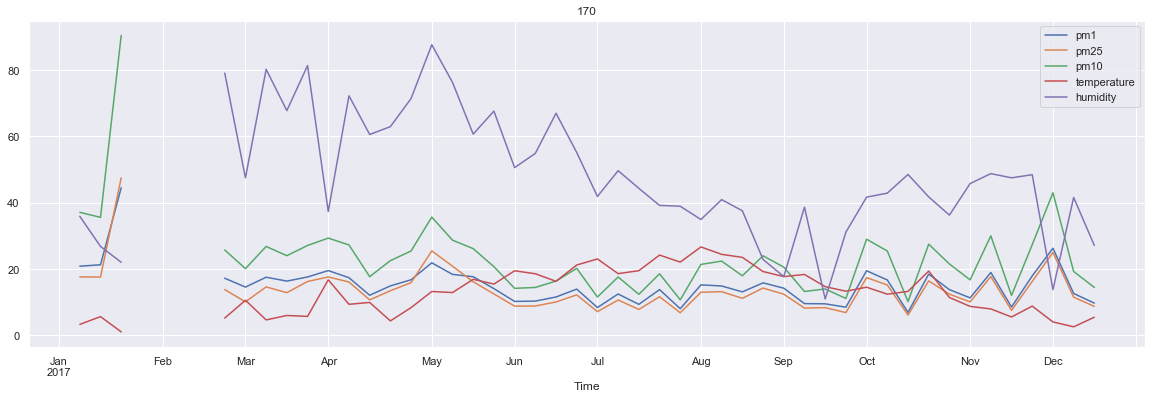

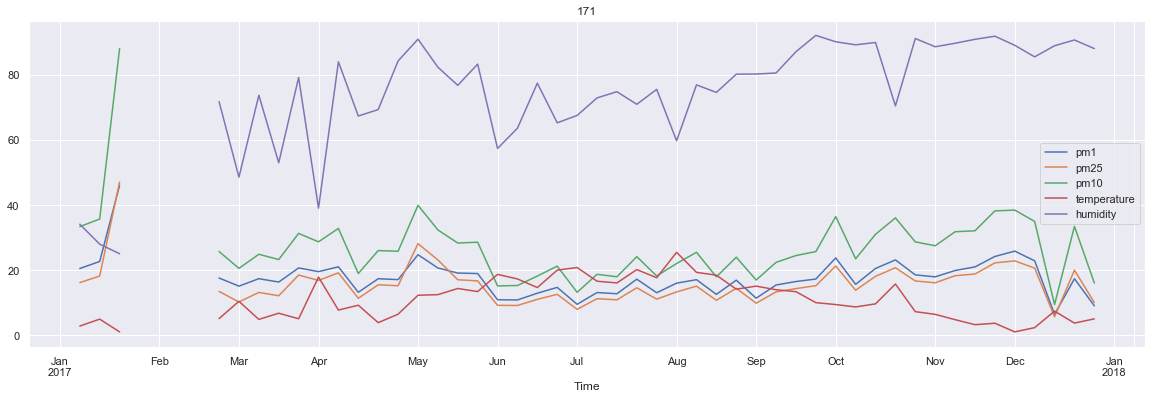

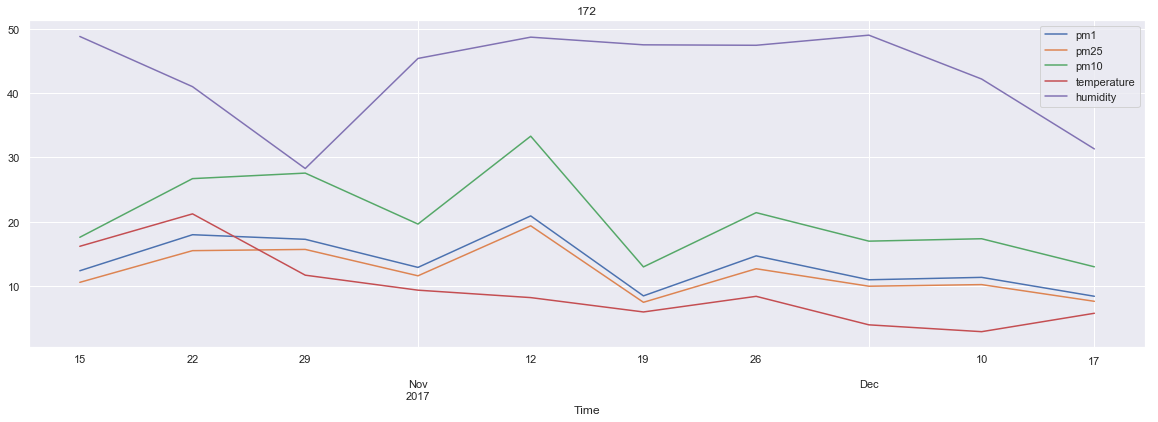

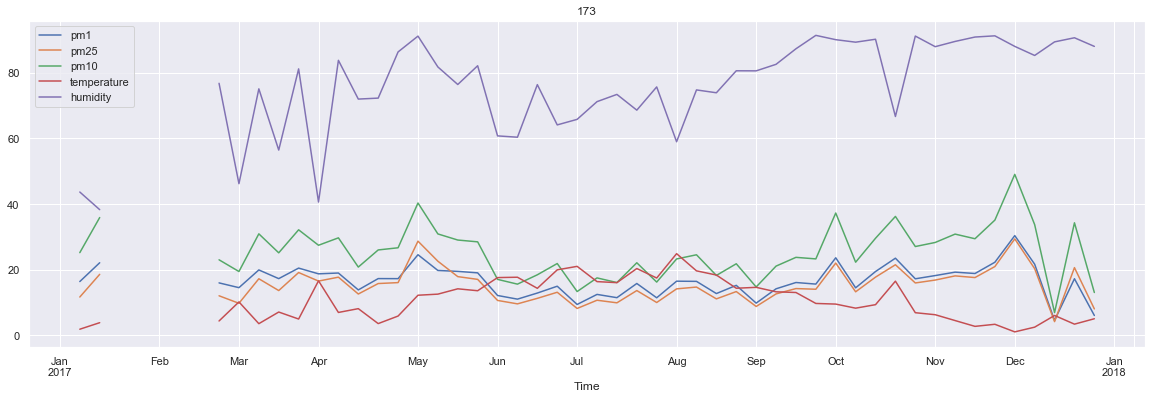

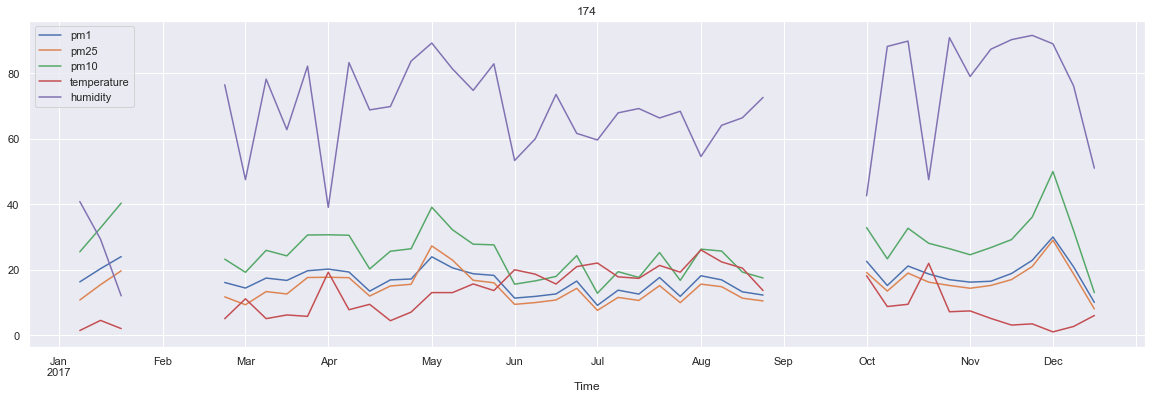

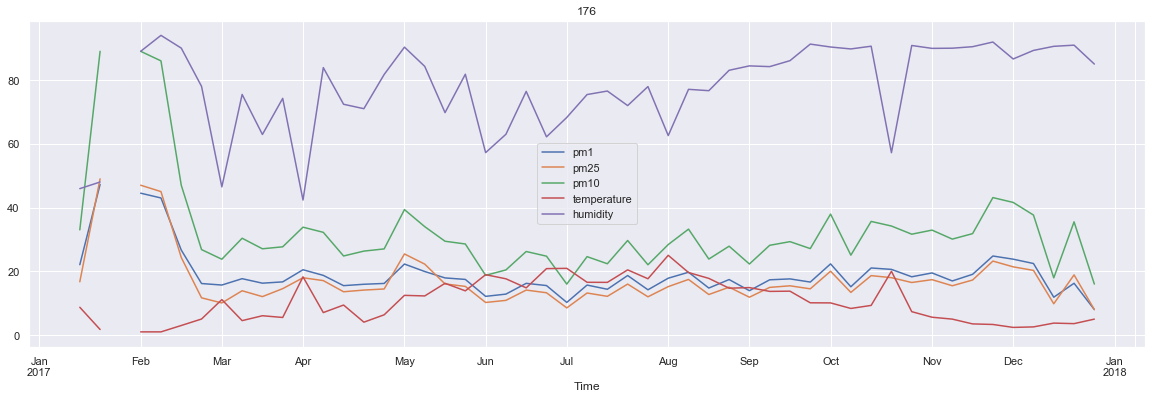

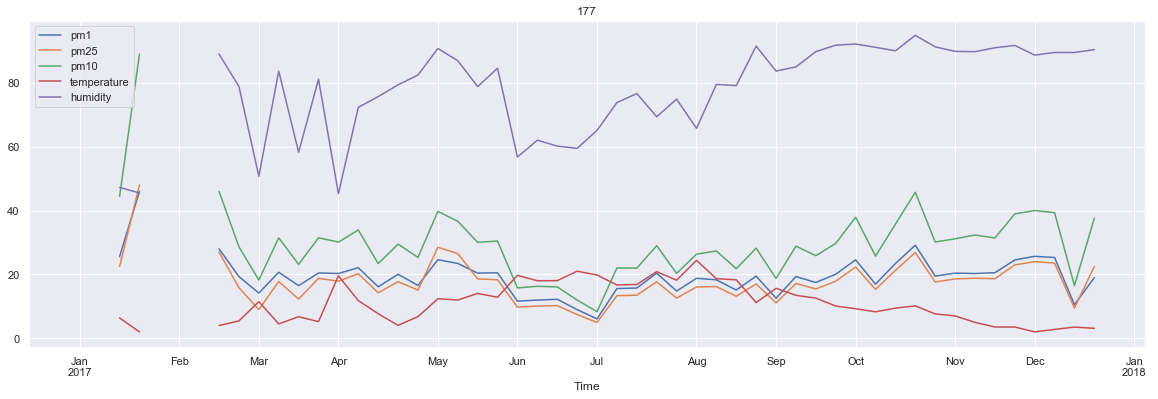

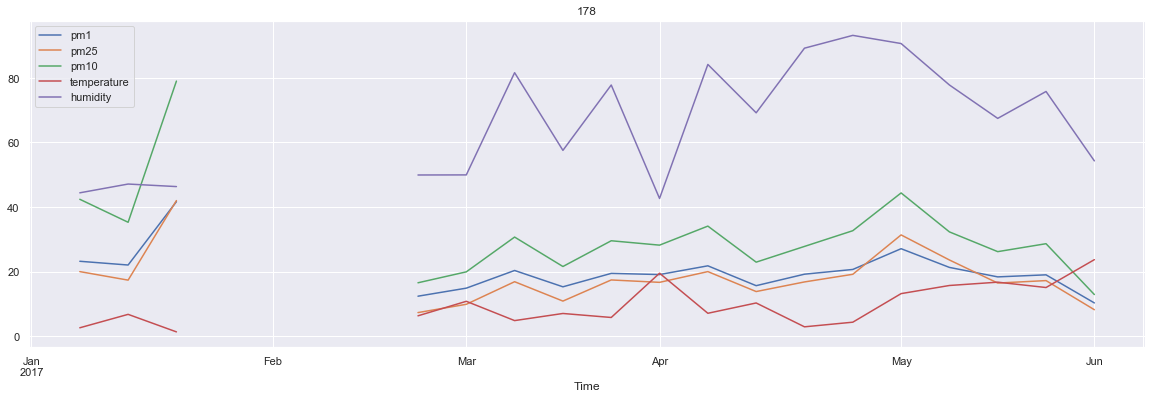

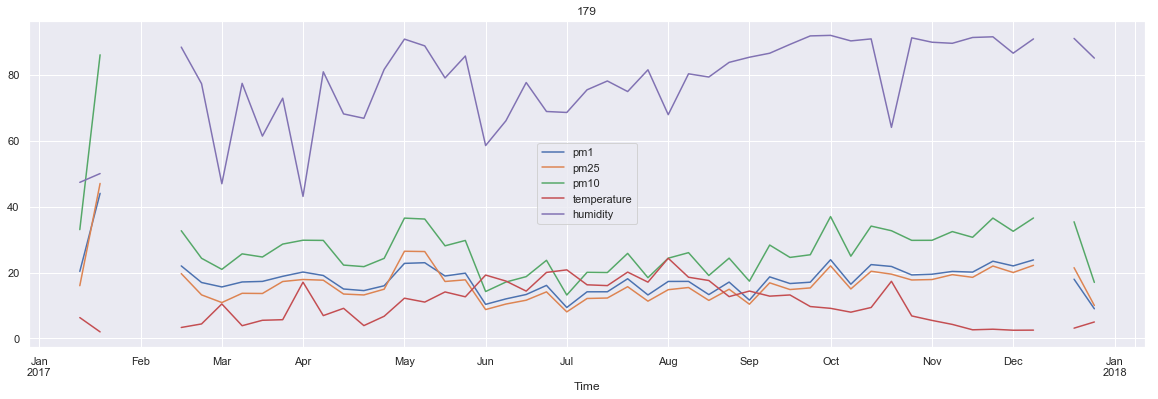

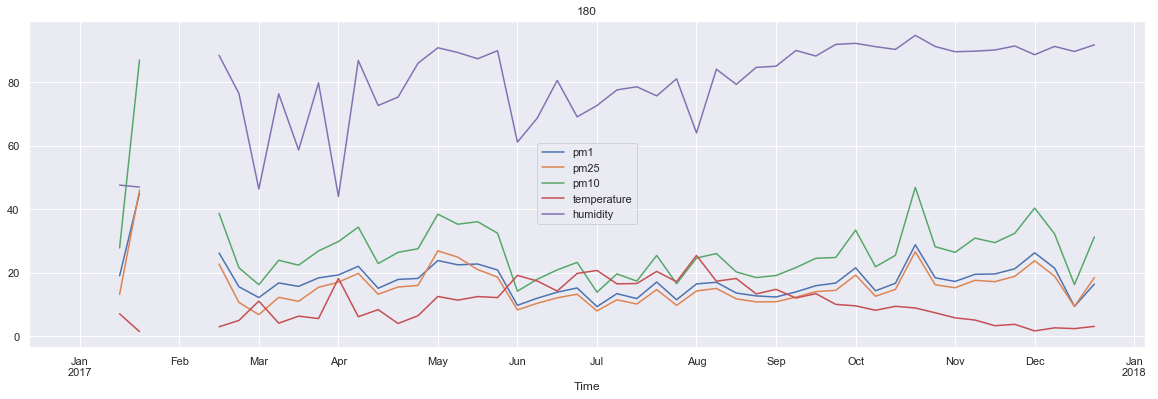

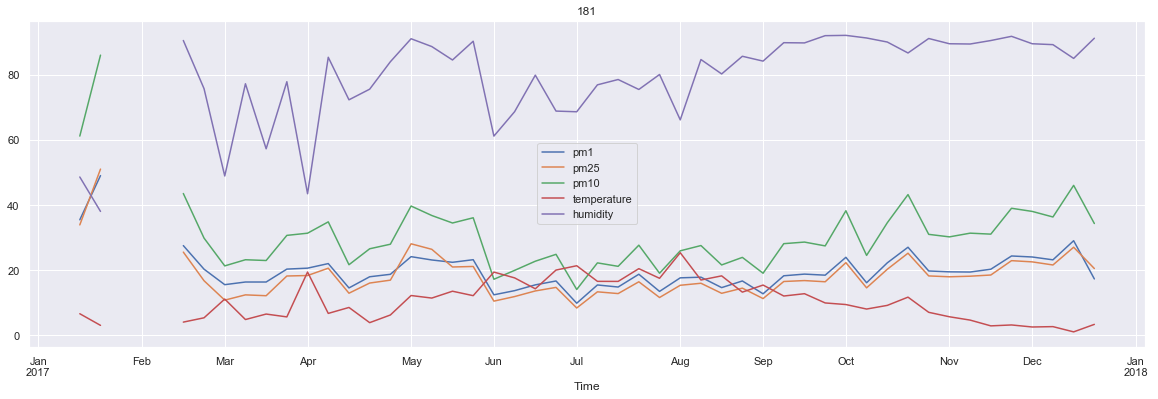

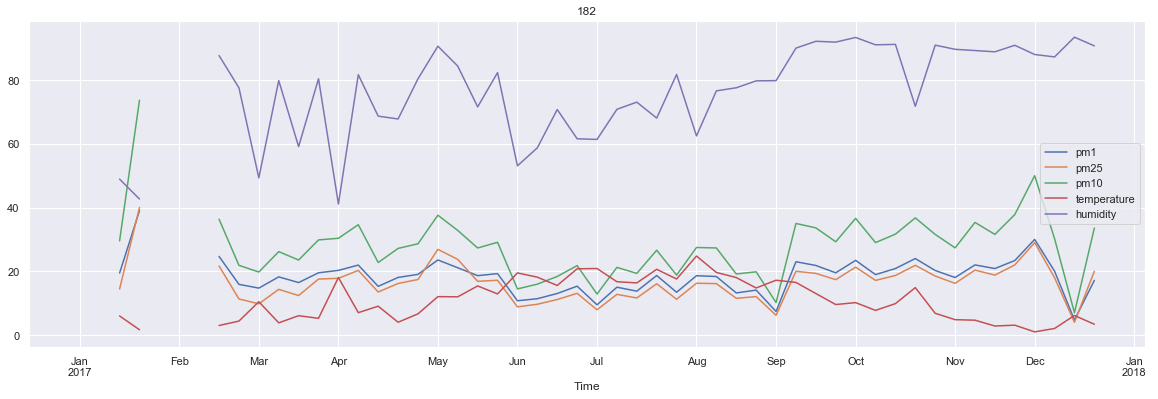

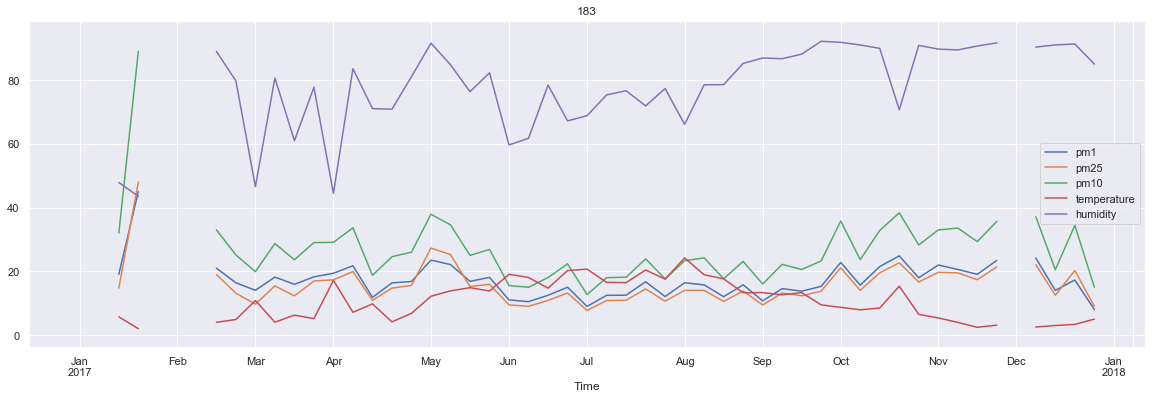

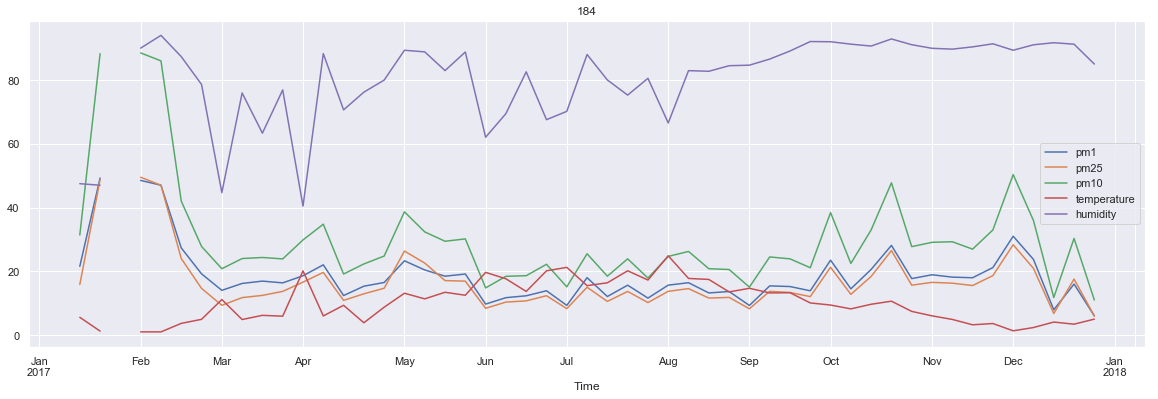

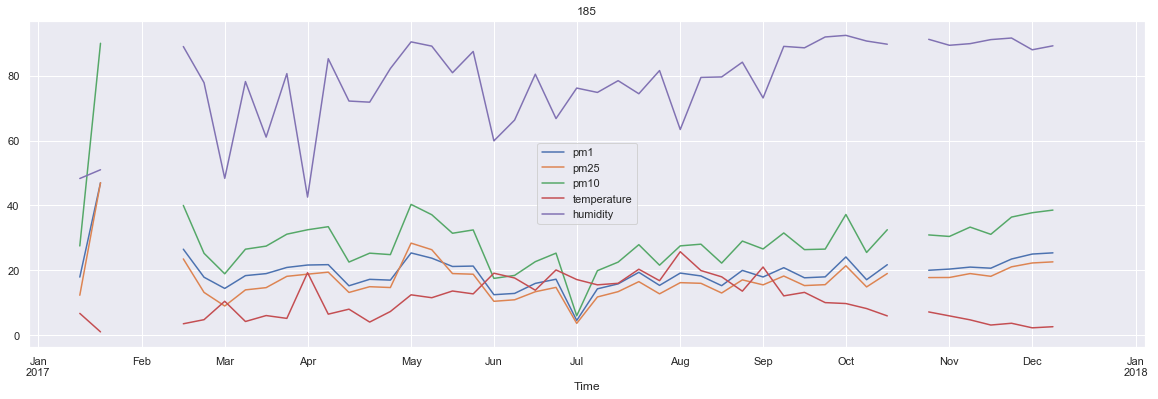

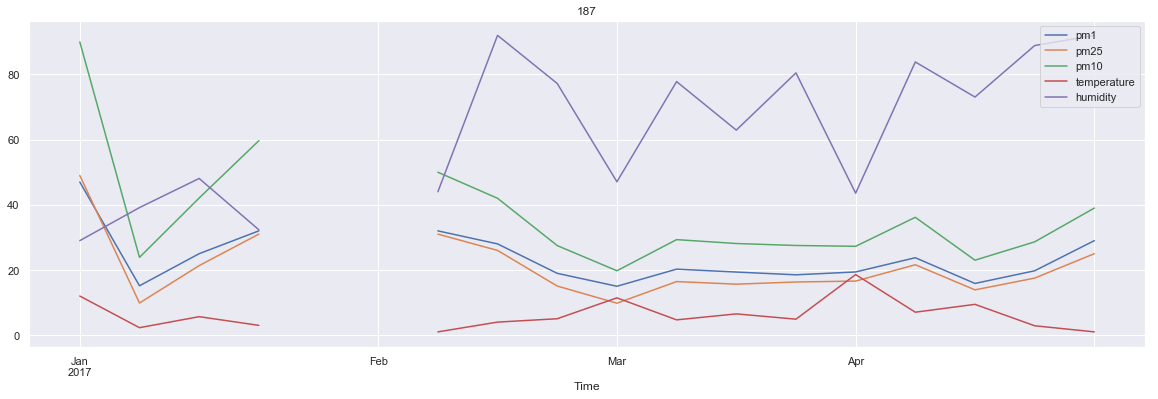

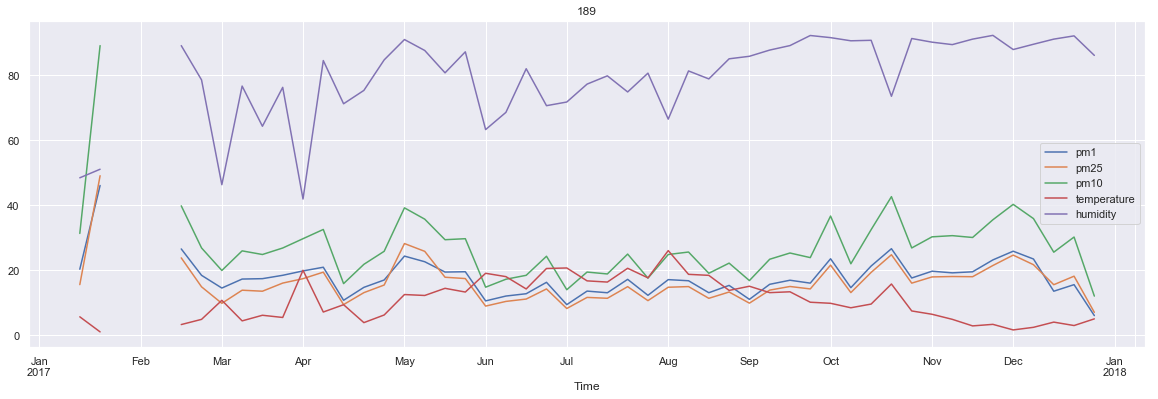

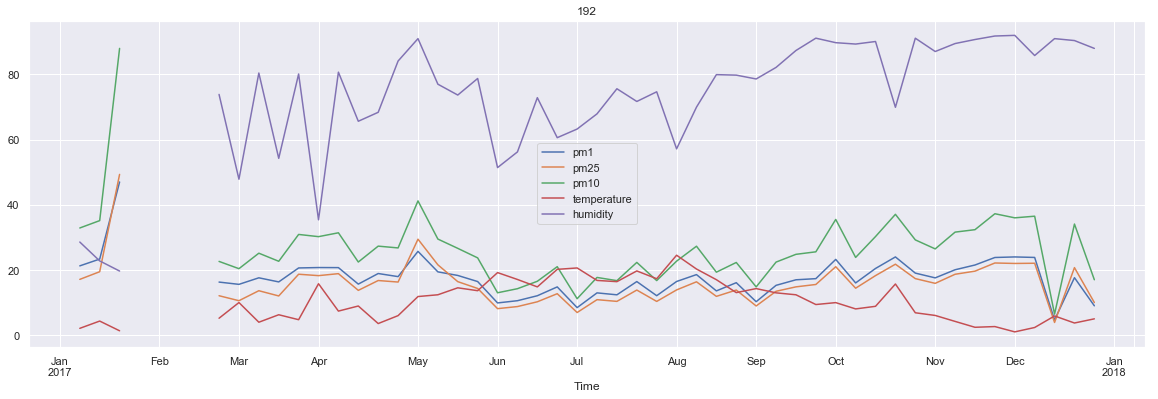

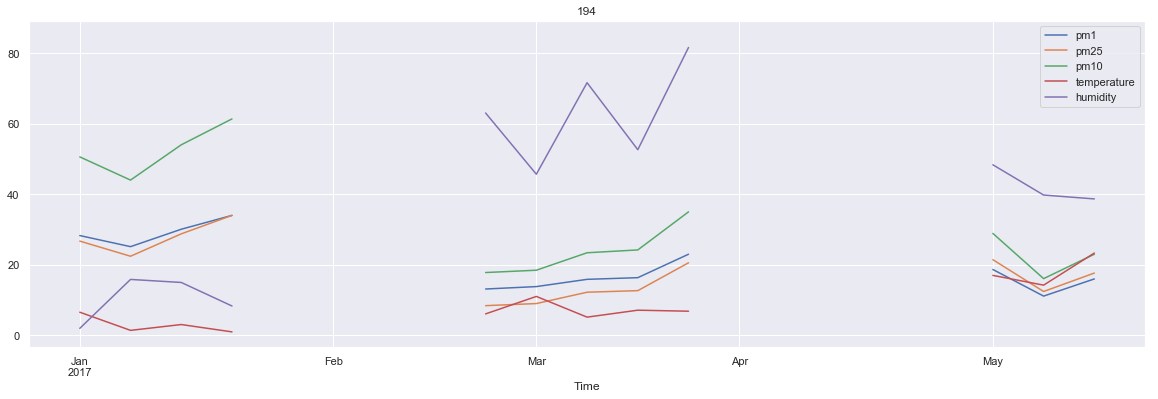

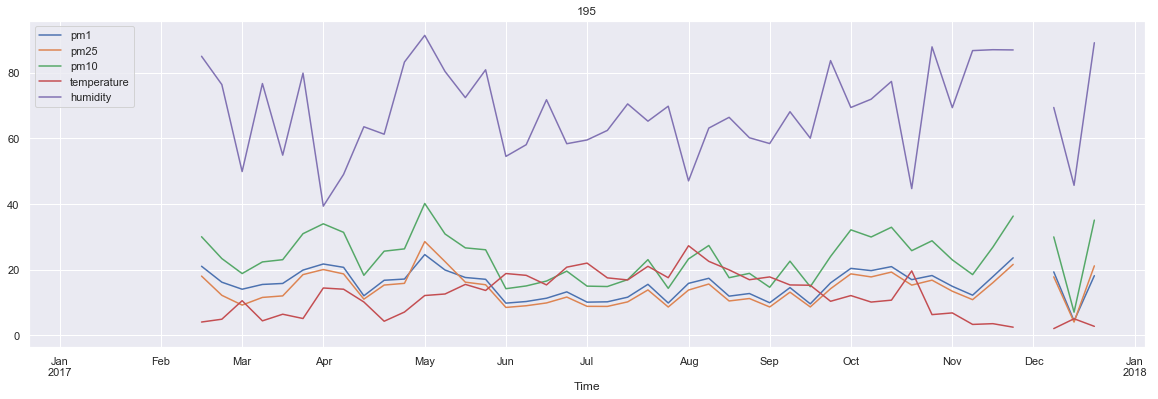

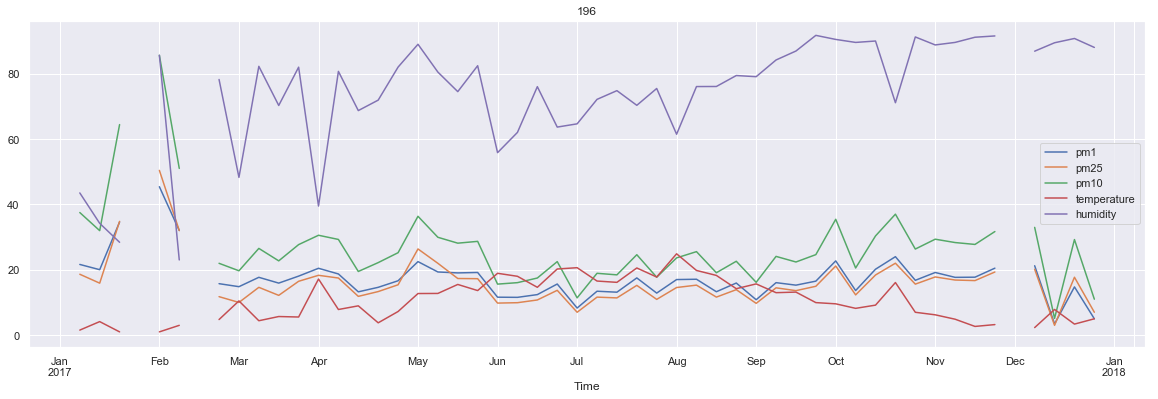

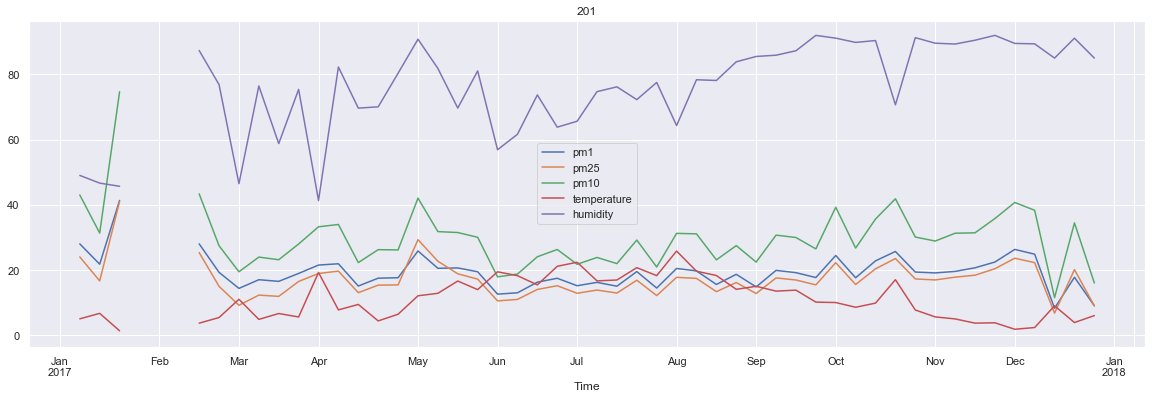

In [38]:
captor = list(all_cap['SensorId'].unique())
for i in captor :
    view = all_cap[all_cap['SensorId']==i]
    view[['pm1','pm25','pm10','temperature','humidity']].resample('W').mean().plot(figsize=(20,6))
    plt.title(i)
    plt.show()

#### Localisation graphique des points

In [39]:
Max = 8760

In [101]:
ratio_cap = all_cap.groupby(['SensorId'], as_index=False).count()
ratio_cap = ratio_cap[['SensorId','pm1']]
ratio_cap.columns = ['SensorId','valeur']
ratio_cap['ratio'] = (ratio_cap['valeur']/Max)*100

In [102]:
#Visualisation des ratios des capteurs
#plt.hist(list(ratio_cap.capteur), list(ratio_cap.valeur), label = '')

In [103]:
coor = (all_cap.reset_index())[['SensorId','latitude','longitude']]

In [104]:
coor = coor.drop_duplicates().reset_index(drop=True)

In [106]:
ratio_cap = pd.merge(ratio_cap,coor, on='SensorId')

In [128]:
ratio_cap.describe()

,SensorId,valeur,ratio,latitude,longitude
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,177.576923,1922.038462,21.941078,250.317215,99.717737
std,15.373153,979.634605,11.183043,0.106519,0.276145
min,140.000000,162.000000,1.849315,250.090030,99.337520
25%,172.250000,1899.500000,21.683790,250.252099,99.497926
50%,179.500000,2338.000000,26.689498,250.318865,99.660363
75%,186.500000,2439.000000,27.842466,250.388171,99.834388
max,201.000000,3122.000000,35.639269,250.491520,100.507845


In [126]:
!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [121]:
import folium

In [122]:
m = folium.Map([250.3,99.7], zoom_start=5)
m

AttributeError: 'numpy.float64' object has no attribute 'get_name'